In [363]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Union, List
from scipy.interpolate import Rbf, interp1d
from scipy.signal import decimate, resample_poly, resample

# Data loading

In [364]:

def _read_txt(file_path: str) -> np.ndarray:
    """
    Reads data from a text file and returns it as a numpy array.
    """
    with open(file_path, "r") as txt:
        next(txt)  # Skip header
        data = np.asanyarray([np.single(line.strip().split("\t")) for line in txt])

    return data

def read_well_txt(folder_path: str) -> Tuple[List[np.ndarray], List[np.ndarray]]:
    """
    Reads well data from text files in the given folder path.
    Returns a tuple containing lists of DTP and RHOB data arrays.
    """

    data_dict = {'dtp': [], 'dtp_labels': [], 'rhob': [], 'rhob_labels': []}

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        if os.path.isfile(file_path):
            file_keyword = next((key for key in data_dict.keys() if key in filename.lower()), None)
            data_dict[file_keyword].append(_read_txt(file_path))
            data_dict[file_keyword + "_labels"].append(re.findall(r'\d+', filename))
    if data_dict['dtp_labels'] == data_dict['rhob_labels']:
        print("--Uploading has passed succesfully--")
    else: 
        raise ImportError("Not equal number of wells for each log")

    return data_dict['dtp'], data_dict['rhob'], data_dict['dtp_labels'], data_dict['rhob_labels']


In [365]:
folder = r"C:\Users\Владислав\Downloads\LOG _unique"

dtp, rhob, dtp_labels, rhob_labels = read_well_txt(folder)


--Uploading has passed succesfully--


In [366]:
def r2even(f):
    if (np.floor(f)%2 == 0): 
        return np.floor(f)
    else: 
        return np.floor(f)+1
    
def interp(x: np.ndarray, y: np.ndarray, step: float, kind="cubic", fill_value="extrapolate"):
    """
    func takes 2 numpy.arrays (x,y by default) and desired step for the first array
    than, it interpolates values y for new x:

    input:
    x -> np.array([1, 2, 3, 4, 5, 6])
    y -> np.array([10, 15, 20, 25, 30, 35])
    step - > 1.5

    output:
    x_new -> np.array([1, 2.5, 4, 5.5])
    y_new -> np.array([10, 17.5, 25, 32.5])

    you can also adjust the inner parameters of the interplate.interp1d func (kind, fill_value)
    which are "cubic" and "extrapolate" by default
    """
    #exceptions
    if not isinstance(x, np.ndarray) or not isinstance(y, np.ndarray):
        raise TypeError("Input 'x' and 'y' must be NumPy arrays")
    if x.shape != y.shape:
        raise ValueError("Input 'x' and 'y' must have the same shape")

    #functional block       
    f = interp1d(x, y, kind=kind, fill_value=fill_value)
    xnew = np.arange(r2even(x[0]), r2even(x[-1])+1, step)
    ynew = f(xnew)
    return xnew, ynew

In [368]:
"""np.r_ is a short concatenation method"""
dtp_decimated = [np.r_['r', interp(dtp[i][:, 2], dtp[i][:, 3], 2, kind = "nearest")].T for i in range(len(dtp))]
rhob_decimated = [np.r_['r', interp(rhob[i][:, 2], rhob[i][:, 3], 2, kind = "nearest")].T for i in range(len(dtp))]

In [370]:
for i in range(len(dtp)):
    len_rhob = len(rhob_decimated[i])
    len_dtp = len(dtp_decimated[i])

    if (len_dtp > len_rhob):
        dtp_decimated[i] = dtp_decimated[i][:len_rhob, :] 
    else:
        rhob_decimated[i] = rhob_decimated[i][:len_dtp, :]



In [378]:
"""
Закончил на том, что сделал децимацию каротажек и продумал обрезку по самой короткой из двух
Дальше нужно перевести медленность в скорость (ПРАВИЛЬНО!) и посчитать импеданс
Пришить это все к глубинам 
Расчитать inline/crossline для каждой скважины
""" 

'\nЗакончил на том, что сделал децимацию каротажек и продумал обрезку по самой короткой из двух\nДальше нужно перевести медленность в скорость (ПРАВИЛЬНО!) и посчитать импеданс\nПришить это все к глубинам \n'

In [373]:
ai_decimated = [dtp_decimated[i][:, 1]*rhob_decimated[i][:, 1].T for i in range(len(dtp))]

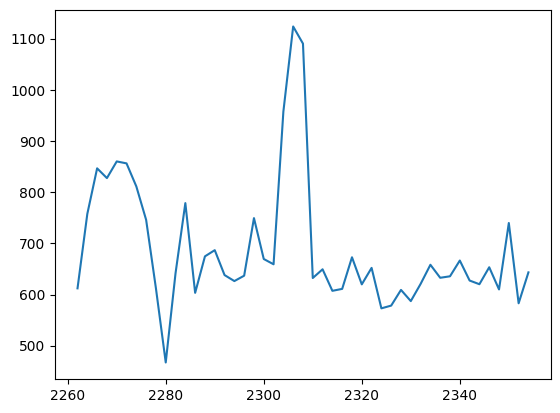

In [374]:
w_num =  0

# plt.plot(dtp[w_num][:, 2], dtp[w_num][:, 3])

# plt.plot(dtp_decimated[w_num][:, 0], dtp_decimated[w_num][:, 1])

plt.plot(dtp_decimated[w_num][:, 0], ai_decimated[w_num][:, 1])
# plt.ylim([0, 3])